In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheets = pd.read_excel("Data Analyst Intern Assignment - Excel.xlsx" ,sheet_name=None)

# Extract the individual datasets
user_details = sheets['UserDetails.csv']
cooking_sessions = sheets['CookingSessions.csv']
order_details = sheets['OrderDetails.csv']

# Inspect the data
print("UserDetails:", user_details.head(), sep="\n")
print("CookingSessions:", cooking_sessions.head(), sep="\n")
print("OrderDetails:", order_details.head(), sep="\n")


UserDetails:
  User ID      User Name  Age       Location Registration Date         Phone  \
0    U001  Alice Johnson   28       New York        2023-01-15  123-456-7890   
1    U002      Bob Smith   35    Los Angeles        2023-02-20  987-654-3210   
2    U003    Charlie Lee   42        Chicago        2023-03-10  555-123-4567   
3    U004    David Brown   27  San Francisco        2023-04-05  444-333-2222   
4    U005     Emma White   30        Seattle        2023-05-22  777-888-9999   

               Email Favorite Meal  Total Orders  
0    alice@email.com        Dinner            12  
1      bob@email.com         Lunch             8  
2  charlie@email.com     Breakfast            15  
3    david@email.com        Dinner            10  
4     emma@email.com         Lunch             9  
CookingSessions:
  Session ID User ID        Dish Name  Meal Type       Session Start  \
0       S001    U001        Spaghetti     Dinner 2024-12-01 19:00:00   
1       S002    U002     Caesar Salad  

## Data Cleaning 

In [3]:
#Checking for missing values
print(user_details.isnull().sum())
print(cooking_sessions.isnull().sum())
print(order_details.isnull().sum())

User ID              0
User Name            0
Age                  0
Location             0
Registration Date    0
Phone                0
Email                0
Favorite Meal        0
Total Orders         0
dtype: int64
Session ID         0
User ID            0
Dish Name          0
Meal Type          0
Session Start      0
Session End        0
Duration (mins)    0
Session Rating     0
dtype: int64
Order ID        0
User ID         0
Order Date      0
Meal Type       0
Dish Name       0
Order Status    0
Amount (USD)    0
Time of Day     0
Rating          2
Session ID      0
dtype: int64


In [4]:
# Standardize column names for all datasets
user_details.columns = user_details.columns.str.strip().str.lower().str.replace(' ', '_')
cooking_sessions.columns = cooking_sessions.columns.str.strip().str.lower().str.replace(' ', '_')
order_details.columns = order_details.columns.str.strip().str.lower().str.replace(' ', '_')

# Print the standardized column names
print("Standardized UserDetails Columns:", user_details.columns)
print("Standardized CookingSessions Columns:", cooking_sessions.columns)
print("Standardized OrderDetails Columns:", order_details.columns)


Standardized UserDetails Columns: Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders'],
      dtype='object')
Standardized CookingSessions Columns: Index(['session_id', 'user_id', 'dish_name', 'meal_type', 'session_start',
       'session_end', 'duration_(mins)', 'session_rating'],
      dtype='object')
Standardized OrderDetails Columns: Index(['order_id', 'user_id', 'order_date', 'meal_type', 'dish_name',
       'order_status', 'amount_(usd)', 'time_of_day', 'rating', 'session_id'],
      dtype='object')


In [5]:
#Convert data types for UserDetails
user_details['registration_date'] = pd.to_datetime(user_details['registration_date'])
user_details['age'] = pd.to_numeric(user_details['age'], errors='coerce')
user_details['total_orders'] = pd.to_numeric(user_details['total_orders'], errors='coerce')

#Convert data types for CookingSessions
cooking_sessions['session_start'] = pd.to_datetime(cooking_sessions['session_start'])
cooking_sessions['session_end'] = pd.to_datetime(cooking_sessions['session_end'])
cooking_sessions['duration_(mins)'] = pd.to_numeric(cooking_sessions['duration_(mins)'], errors='coerce')

#Convert data types for OrderDetails
order_details['order_date'] = pd.to_datetime(order_details['order_date'])
order_details['amount_(usd)'] = pd.to_numeric(order_details['amount_(usd)'], errors='coerce')
order_details['rating'] = pd.to_numeric(order_details['rating'], errors='coerce')


In [6]:
# Check data types for each dataset
print("UserDetails Data Types:", user_details.dtypes)
print("CookingSessions Data Types:", cooking_sessions.dtypes)
print("OrderDetails Data Types:", order_details.dtypes)


UserDetails Data Types: user_id                      object
user_name                    object
age                           int64
location                     object
registration_date    datetime64[ns]
phone                        object
email                        object
favorite_meal                object
total_orders                  int64
dtype: object
CookingSessions Data Types: session_id                 object
user_id                    object
dish_name                  object
meal_type                  object
session_start      datetime64[ns]
session_end        datetime64[ns]
duration_(mins)             int64
session_rating            float64
dtype: object
OrderDetails Data Types: order_id                 int64
user_id                 object
order_date      datetime64[ns]
meal_type               object
dish_name               object
order_status            object
amount_(usd)           float64
time_of_day             object
rating                 float64
session_id          

In [7]:
# Remove hyphens from the phone numbers
user_details['phone'] = user_details['phone'].str.replace('-', '', regex=True)

# Converting objects to integers
user_details['phone'] = user_details['phone'].astype('int64')


In [8]:
# Check for missing values
print("Missing Values in UserDetails:\n", user_details.isnull().sum())
print("Missing Values in CookingSessions:\n", cooking_sessions.isnull().sum())
print("Missing Values in OrderDetails:\n", order_details.isnull().sum())


Missing Values in UserDetails:
 user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
dtype: int64
Missing Values in CookingSessions:
 session_id         0
user_id            0
dish_name          0
meal_type          0
session_start      0
session_end        0
duration_(mins)    0
session_rating     0
dtype: int64
Missing Values in OrderDetails:
 order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          2
session_id      0
dtype: int64


In [9]:
#filling the missing value 
order_details['rating'] = order_details['rating'].fillna(0)
print("Missing Values After Cleaning:\n", order_details.isnull().sum())

Missing Values After Cleaning:
 order_id        0
user_id         0
order_date      0
meal_type       0
dish_name       0
order_status    0
amount_(usd)    0
time_of_day     0
rating          0
session_id      0
dtype: int64


## Data Merging 

In [10]:
# Merge UserDetails with CookingSessions on 'User ID'
merged_user_cooking = pd.merge(user_details, cooking_sessions, on='user_id', how='inner')

# Inspect the merged data
print("Merged UserDetails and CookingSessions:")
print(merged_user_cooking.head())


Merged UserDetails and CookingSessions:
  user_id      user_name  age     location registration_date       phone  \
0    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
1    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
2    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
3    U002      Bob Smith   35  Los Angeles        2023-02-20  9876543210   
4    U002      Bob Smith   35  Los Angeles        2023-02-20  9876543210   

             email favorite_meal  total_orders session_id        dish_name  \
0  alice@email.com        Dinner            12       S001        Spaghetti   
1  alice@email.com        Dinner            12       S004         Pancakes   
2  alice@email.com        Dinner            12       S009  Grilled Chicken   
3    bob@email.com         Lunch             8       S002     Caesar Salad   
4    bob@email.com         Lunch             8       S006        Spaghetti   

   meal_type       session_start  

In [11]:
# Merge the result with OrderDetails on 'User ID' and 'Session ID'
final_merged_data = pd.merge(merged_user_cooking, order_details, on=['user_id', 'session_id'], how='inner')

# Inspect the final merged data
print("Final Merged Data:")
print(final_merged_data.head())


Final Merged Data:
  user_id      user_name  age     location registration_date       phone  \
0    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
1    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
2    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
3    U002      Bob Smith   35  Los Angeles        2023-02-20  9876543210   
4    U002      Bob Smith   35  Los Angeles        2023-02-20  9876543210   

             email favorite_meal  total_orders session_id  ...  \
0  alice@email.com        Dinner            12       S001  ...   
1  alice@email.com        Dinner            12       S004  ...   
2  alice@email.com        Dinner            12       S009  ...   
3    bob@email.com         Lunch             8       S002  ...   
4    bob@email.com         Lunch             8       S006  ...   

  duration_(mins) session_rating order_id order_date  meal_type_y  \
0              30            4.5     1001 2024-12-01      

In [12]:
print("Shape of the final dataset:", final_merged_data.shape)
print("Missing Values in Final Merged Data:\n", final_merged_data.isnull().sum())
print("Sample Rows:\n", final_merged_data.head())


Shape of the final dataset: (16, 24)
Missing Values in Final Merged Data:
 user_id              0
user_name            0
age                  0
location             0
registration_date    0
phone                0
email                0
favorite_meal        0
total_orders         0
session_id           0
dish_name_x          0
meal_type_x          0
session_start        0
session_end          0
duration_(mins)      0
session_rating       0
order_id             0
order_date           0
meal_type_y          0
dish_name_y          0
order_status         0
amount_(usd)         0
time_of_day          0
rating               0
dtype: int64
Sample Rows:
   user_id      user_name  age     location registration_date       phone  \
0    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
1    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
2    U001  Alice Johnson   28     New York        2023-01-15  1234567890   
3    U002      Bob Smith   35  Los Angeles

In [13]:
# removing the dupiactes and changing the column name 

final_merged_data= final_merged_data.loc[:, ~final_merged_data.columns.duplicated()]
final_merged_data.rename(columns={'dish_name_x': 'dish_name', 'meal_type_y': 'meal_type', 'dish_name_y':'dish_name'}, inplace=True)

In [14]:
#column names in the merged dataset
print(final_merged_data.columns)

Index(['user_id', 'user_name', 'age', 'location', 'registration_date', 'phone',
       'email', 'favorite_meal', 'total_orders', 'session_id', 'dish_name',
       'meal_type_x', 'session_start', 'session_end', 'duration_(mins)',
       'session_rating', 'order_id', 'order_date', 'meal_type', 'dish_name',
       'order_status', 'amount_(usd)', 'time_of_day', 'rating'],
      dtype='object')


In [56]:
print(final_merged_data.dtypes)

user_id                      object
user_name                    object
age                           int64
location                     object
registration_date    datetime64[ns]
phone                         int64
email                        object
favorite_meal                object
total_orders                  int64
session_id                   object
dish_name                    object
meal_type_x                  object
session_start        datetime64[ns]
session_end          datetime64[ns]
duration_(mins)               int64
session_rating              float64
order_id                      int64
order_date           datetime64[ns]
meal_type                    object
dish_name                    object
order_status                 object
amount_(usd)                float64
time_of_day                  object
rating                      float64
dtype: object


## Data  Visualization

In [149]:
# Check the first few entries in the 'dish_name' column
print(final_merged_data['dish_name'])
print(final_merged_data['dish_name'].shape)

0           Spaghetti
1            Pancakes
2     Grilled Chicken
3        Caesar Salad
4           Spaghetti
5             Oatmeal
6     Grilled Chicken
7       Veggie Burger
8            Pancakes
9        Caesar Salad
10          Spaghetti
11    Grilled Chicken
12       Caesar Salad
13    Grilled Chicken
14          Spaghetti
15      Veggie Burger
Name: dish_name, dtype: object
(16,)


In [161]:
# Count the number of orders per dish
popular_dishes = final_merged_data.groupby('dish_name')['order_id'].count().reset_index()
popular_dishes.columns = ['dish_name', 'order_count']

# Sort by the number of orders
popular_dishes = popular_dishes.sort_values(by='order_count', ascending=False)


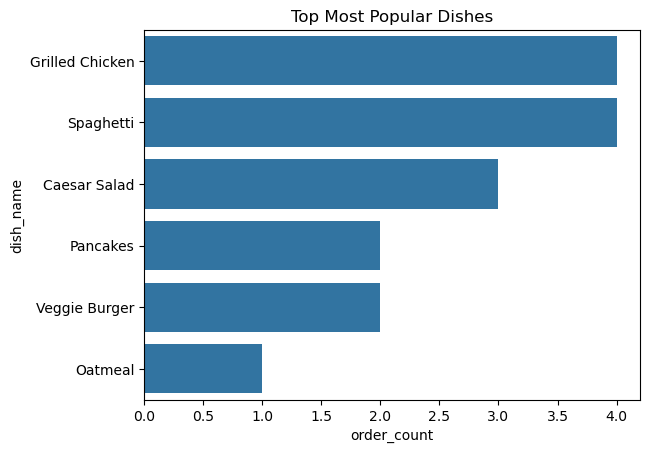

In [169]:
# Top 10 Popular Dishes
top_10_dishes = popular_dishes
sns.barplot(x='order_count', y='dish_name', data=top_10_dishes)
plt.title('Top Most Popular Dishes')
plt.show()


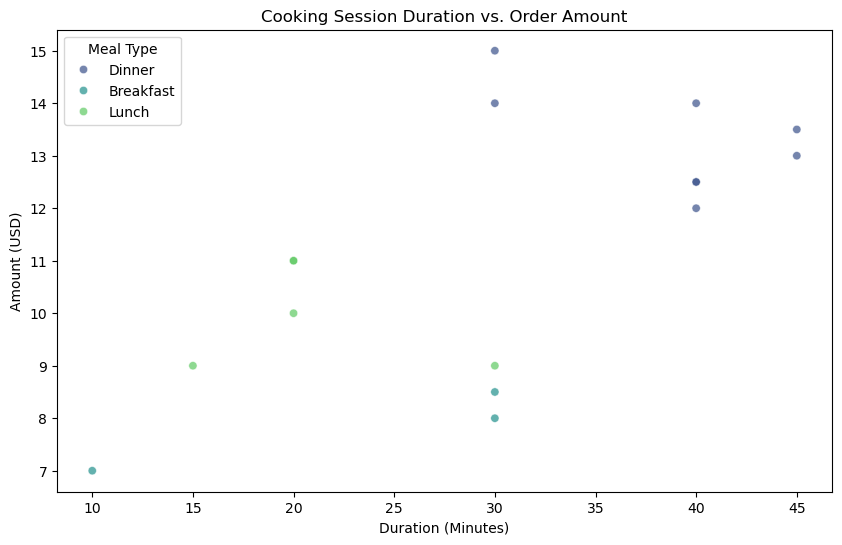

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=final_merged_data,
    x='duration_(mins)',
    y='amount_(usd)',
    hue='meal_type',
    palette='viridis',
    alpha=0.7
)
plt.title('Cooking Session Duration vs. Order Amount')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Amount (USD)')
plt.legend(title='Meal Type', loc='upper left')
plt.show()

the chart provides a preliminary visual representation of the relationship between cooking session duration and order amount, with some potential insights into how different meal types might contribute to this relationship.

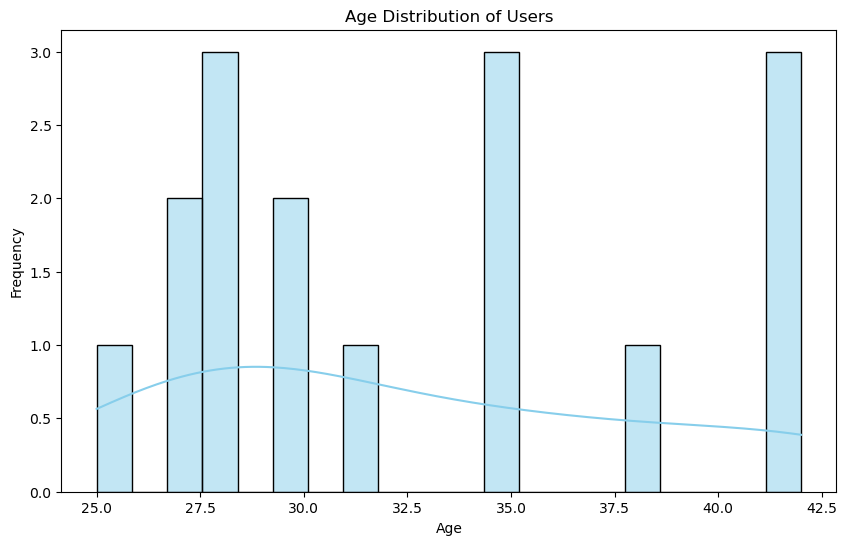

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(final_merged_data['age'], kde=True, color='skyblue', bins=20)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The highest frequency occurs at around age 27.5, indicating that users in this age group are the most represented in the dataset. Users are distributed across ages ranging from approximately 25 to 42.5 years.
Marketing or engagement strategies can focus on the most frequent age groups (27.5 and 35) for maximum impact.

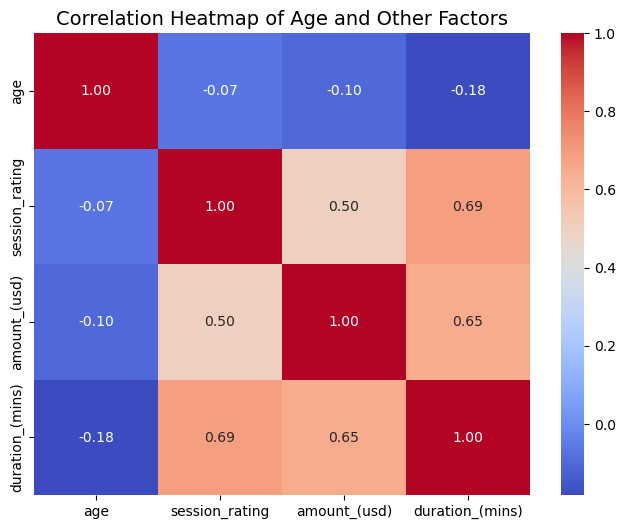

In [83]:
# Analyze correlation using a heatmap
correlation_data = final_merged_data[['age', 'session_rating', 'amount_(usd)', 'duration_(mins)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Age and Other Factors', fontsize=14)
plt.show()


This is a correlation heatmap. It visually represents the strength and direction of the relationships between different pairs of variables.

The heatmap reveals that there are moderate to strong positive correlations between session rating, order amount, and cooking duration. Age, on the other hand, appears to have weak relationships with the other variables.

age has weak negative correlations with all other variables. This suggests that age is not strongly associated with session rating, order amount, or cooking duration.

session_rating has a moderate positive correlation with amount_(usd) and a strong positive correlation with duration_(mins). This indicates that higher session ratings tend to be associated with larger order amounts and longer cooking durations.

amount_(usd) has a moderate positive correlation with duration_(mins). This suggests that larger order amounts tend to be associated with longer cooking durations.

C:\Users\nikhi\AppData\Local\Temp\ipykernel_6008\2363936241.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_merged_data, x='meal_type', y='session_rating', palette='Set2')


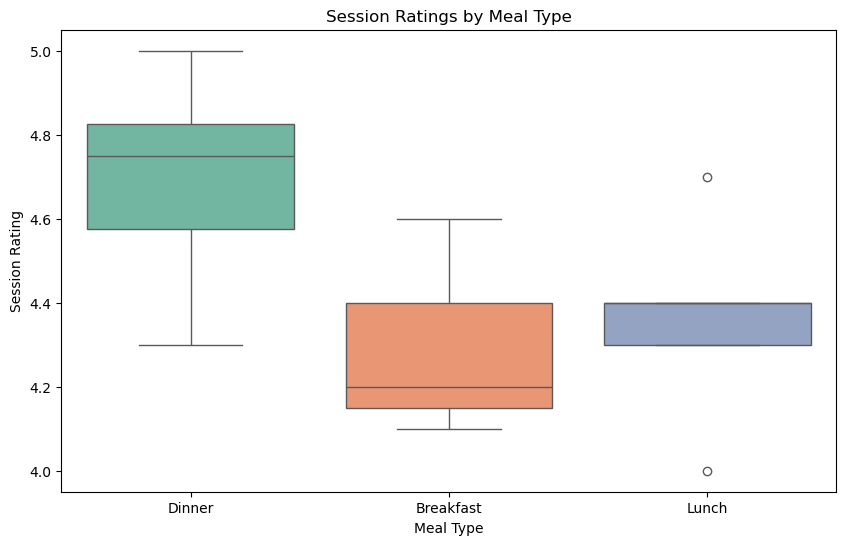

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=final_merged_data, x='meal_type', y='session_rating', palette='Set2')
plt.title('Session Ratings by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Session Rating')
plt.show()


The chart suggests that dinner sessions tend to have higher overall satisfaction compared to breakfast and lunch sessions. Breakfast sessions appear to have the most consistent ratings, while lunch sessions show the most variability.

In [132]:
demographics_analysis = final_merged_data.pivot_table(
    index='location', 
    values='total_orders'
)
print("Orders by Location:")
print(demographics_analysis)

Orders by Location:
               total_orders
location                   
Austin                  7.0
Boston                 14.0
Chicago                15.0
Los Angeles             8.0
Miami                   5.0
New York               12.0
San Francisco          10.0
Seattle                 9.0


C:\Users\nikhi\AppData\Local\Temp\ipykernel_6008\4210732015.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_orders.index, y=location_orders.values, palette='magma')


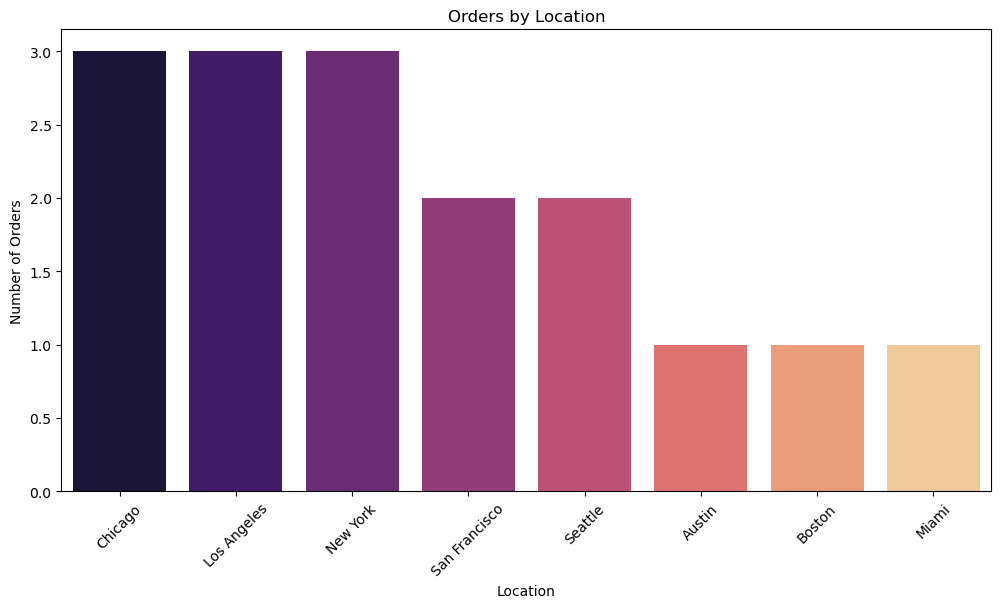

In [35]:
location_orders = final_merged_data.groupby('location')['order_id'].count().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=location_orders.index, y=location_orders.values, palette='magma')
plt.title('Orders by Location')
plt.xlabel('Location')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

The chart reveals that Chicago is the location with the most orders, followed by Los Angeles and New York. The remaining locations have varying levels of order activity, with Austin, Boston, and Miami having the fewest orders.

C:\Users\nikhi\AppData\Local\Temp\ipykernel_6008\277195695.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=final_merged_data, x='meal_type', y='duration_(mins)', palette='husl')


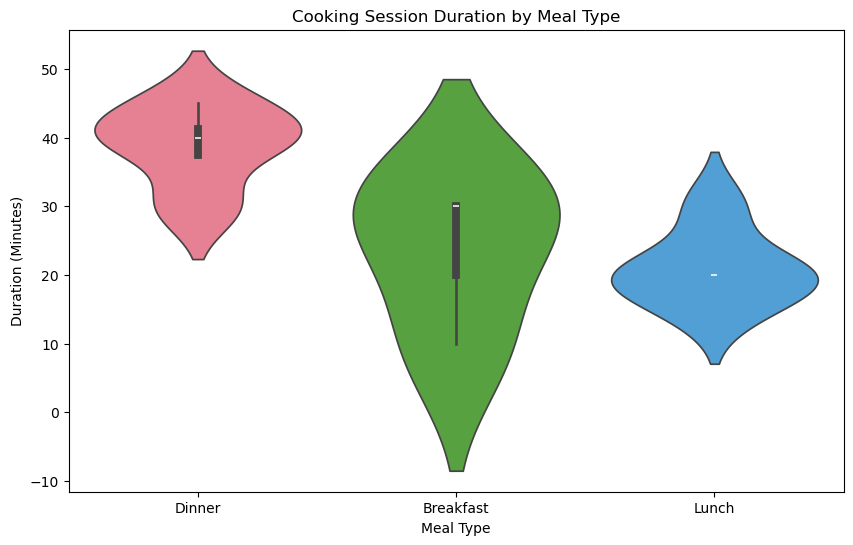

In [39]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=final_merged_data, x='meal_type', y='duration_(mins)', palette='husl')
plt.title('Cooking Session Duration by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Duration (Minutes)')
plt.show()


The black lines within each violin represent the median duration for each meal type.
The white dots within the black lines likely represent outliers, which are data points that fall significantly outside the main distribution.
In summary, the chart reveals that dinner preparation tends to have the most variability in duration, followed by lunch, and then breakfast.

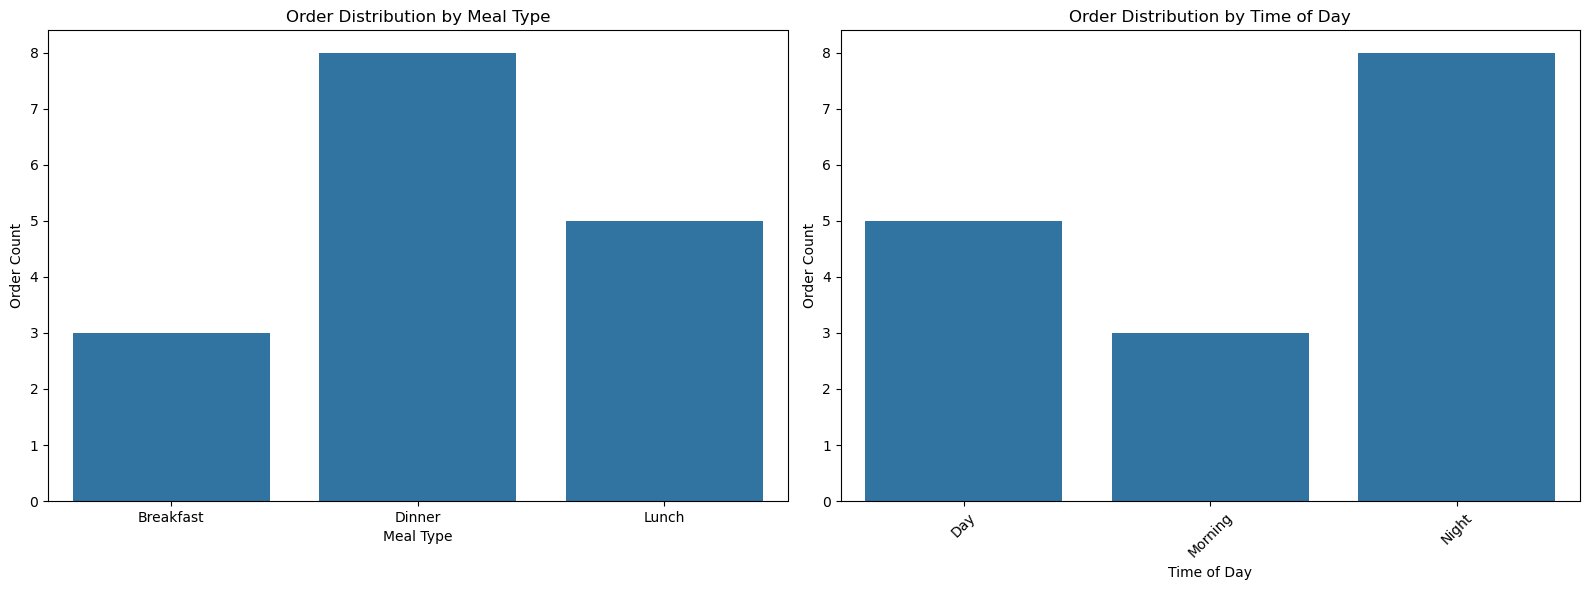

In [50]:
meal_type_dist = final_merged_data.groupby('meal_type')['order_id'].count().reset_index()
time_of_day_dist = final_merged_data.groupby('time_of_day')['order_id'].count().reset_index()
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Meal Type vs Order Count
sns.barplot(x='meal_type', y='order_id', data=meal_type_dist, ax=axes[0])
axes[0].set_title('Order Distribution by Meal Type')
axes[0].set_xlabel('Meal Type')
axes[0].set_ylabel('Order Count')

# Plot for Time of Day vs Order Count
sns.barplot(x='time_of_day', y='order_id', data=time_of_day_dist, ax=axes[1])
axes[1].set_title('Order Distribution by Time of Day')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Order Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Chart 1: Order Distribution by Meal Type
Dinner is the most popular meal type, receiving the highest number of orders (8 orders).
Lunch comes second, with a moderate number of orders (approximately 5 orders).
Breakfast is the least preferred meal type, with only 3 orders.
This indicates that users are more likely to order meals during the dinner period, suggesting an opportunity to focus promotional efforts on dinner-specific offerings.


Chart 2: Order Distribution by Time of Day
This pattern shows a significant preference for ordering during the night, followed by daytime activity. Morning orders are less common, indicating a potential area for growth if morning-specific offerings or promotions are introduced.
Night time dominates with the highest number of orders (8 orders), followed by Day time (5 orders).
Morning has the least number of orders, with just 3.

Since dinner is the most preferred meal type, offering discounts or bundles during dinner hours can increase user engagement and revenue.
Night-time orders are significantly higher, so optimizing delivery efficiency and availability of popular dishes during this period will enhance customer satisfaction.


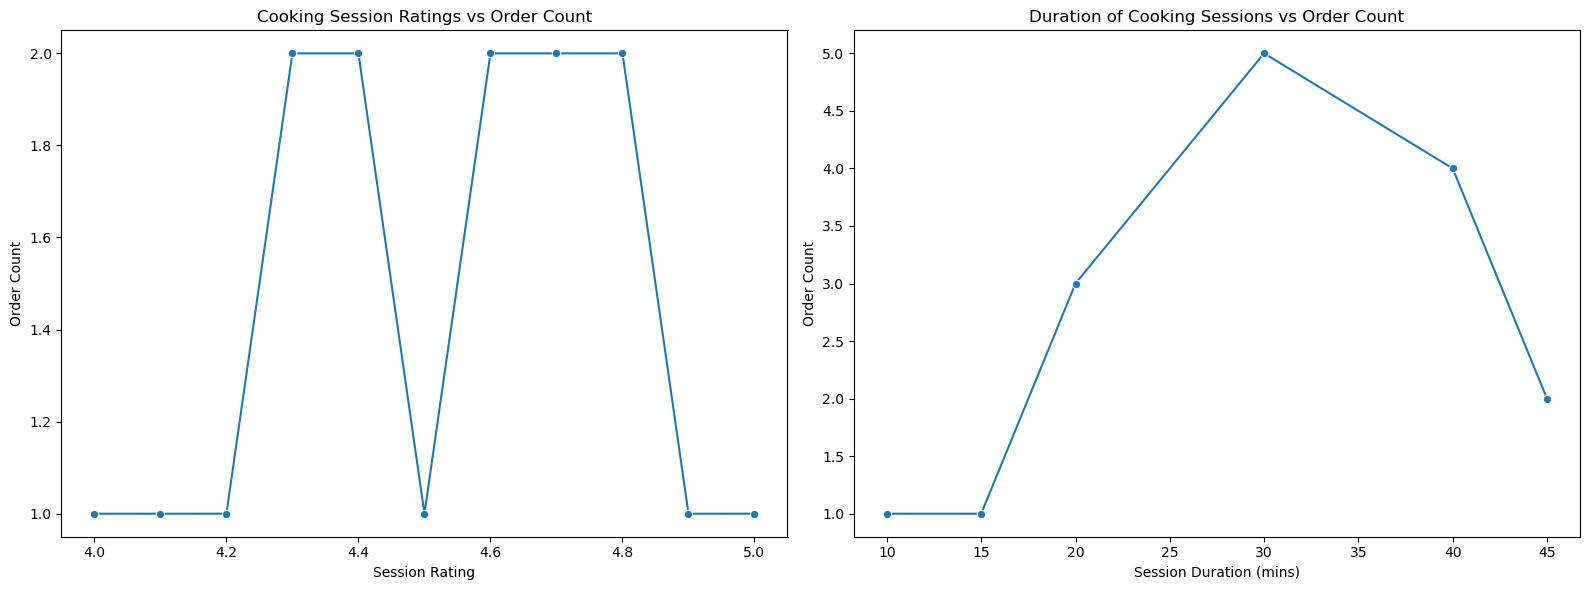

In [69]:
session_rating_vs_orders = final_merged_data.groupby('session_rating')['order_id'].count().reset_index()
session_rating_vs_orders.rename(columns={'order_id': 'order_count'}, inplace=True)
session_duration_vs_orders = final_merged_data.groupby('duration_(mins)')['order_id'].count().reset_index()
session_duration_vs_orders.rename(columns={'order_id': 'order_count'}, inplace=True)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot for Cooking Session Ratings vs Order Count
sns.lineplot(x='session_rating', y='order_count', data=session_rating_vs_orders, marker='o', ax=axes[0])
axes[0].set_title('Cooking Session Ratings vs Order Count')
axes[0].set_xlabel('Session Rating')
axes[0].set_ylabel('Order Count')

# Plot for Duration of Cooking Sessions vs Order Count
sns.lineplot(x='duration_(mins)', y='order_count', data=session_duration_vs_orders, marker='o', ax=axes[1])
axes[1].set_title('Duration of Cooking Sessions vs Order Count')
axes[1].set_xlabel('Session Duration (mins)')
axes[1].set_ylabel('Order Count')

plt.tight_layout()
plt.show()


In [147]:
popular_dishes = final_merged_data['dish_name'].value_counts().head(10)
print("Top 10 Popular Dishes:")
print(popular_dishes)

Top 10 Popular Dishes:
dish_name
Spaghetti          4
Grilled Chicken    4
Caesar Salad       3
Pancakes           2
Veggie Burger      2
Oatmeal            1
Name: count, dtype: int64


# Recommendations

Personalized Meal Offerings:
Based on the data, we recommend offering a broader variety of dinner meals (like Spaghetti, Grilled Chicken, etc.) to cater to users who provide higher session ratings for these meals. For users preferring breakfast or lunch, introducing meal variety in these categories can enhance their satisfaction.

Targeted Promotions for Specific Age Groups:
Consider running marketing campaigns that target the 27-35 age group, highlighting dinner meals and dishes like Grilled Chicken or Spaghetti, as this group tends to rate their cooking sessions higher. For younger users, focusing on breakfast meal promotions like Pancakes could further enhance engagement.

Improved Session Experience:
Since session ratings are impacted by the meal choice, focusing on enhancing the overall cooking experience, particularly for dinner-related sessions, should be a priority. This might involve improving session duration, interactivity, or even providing personalized recommendations based on user preferences.

Age-Based Personalization:
Given the age-related differences in meal preferences and ratings, developing age-based meal plans could prove effective. Younger users may enjoy a more casual and varied breakfast experience, while older users might prefer hearty and nutritious dinner options.

User Feedback and Continuous Improvement:
Continuous feedback collection should be implemented to monitor user satisfaction trends and adjust offerings accordingly. Regularly updating the meal options based on user feedback will help maintain high ratings across different user segments.